In [1]:
import pandas as pd
marketing_dataset = pd.read_csv('marketing_data.csv')
marketing_dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,33,22.703382,2.302986,Mega,118.874049
1,91,28.080056,6.062589,Macro,322.373949
2,68,19.535548,2.056270,Micro,245.082818
3,52,13.560663,2.669573,Nano,187.774044
4,34,7.110267,3.588867,Mega,119.843771


# Creating Dummy Variables

In [2]:
marketing_dataset["Influencer"].unique()

array(['Mega', 'Macro', 'Micro', 'Nano'], dtype=object)

In [3]:
marketing_dataset=pd.get_dummies(marketing_dataset,columns=['Influencer'])
marketing_dataset.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,33,22.703382,2.302986,118.874049,0,1,0,0
1,91,28.080056,6.062589,322.373949,1,0,0,0
2,68,19.535548,2.056270,245.082818,0,0,1,0
3,52,13.560663,2.669573,187.774044,0,0,0,1
4,34,7.110267,3.588867,119.843771,0,1,0,0


In [4]:
response = marketing_dataset["Sales"]
predictors = marketing_dataset[["TV","Radio","Social Media","Influencer_Macro","Influencer_Mega","Influencer_Micro"]]

# Exploring Variable Relationships

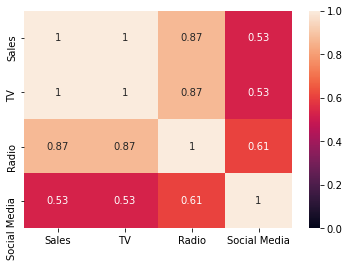

In [5]:
import seaborn as sns

correlation_matrix = marketing_dataset[["Sales","TV","Radio","Social Media"]].corr()
sns.heatmap(correlation_matrix,vmin=0.0,vmax=1.0, annot=True);

# Checking for Linear Relationships

In [6]:
predictors = marketing_dataset[["TV","Social Media","Influencer_Macro","Influencer_Mega","Influencer_Micro"]]

# Regression with SciKitLearn

In [7]:
import sklearn.linear_model as skl

# define the multiple Linear regression model
linear_regression = skl.LinearRegression()

# Fit the multiple Linear regression model
linear_regression.fit(predictors,response)
print(linear_regression.coef_)
print(linear_regression.intercept_)

[3.56146333e+00 9.67134432e-04 7.41686520e-02 8.52722718e-02
 1.62375309e-02]
-0.17681395000818156


In [8]:
#R Squared
r_squared=linear_regression.score(predictors, response)
print(r_squared)

#Adjusted R Squared
#Formula=1-((1-r_squared)*(n-1)/(n-k-1))
n=len(response)
k=predictors.shape[1]

adjusted_r_squared = 1-((1-r_squared)*(n-1)/(n-k-1))
print(adjusted_r_squared)


0.9989951392021675
0.99899403252728


# Inspecting the Distribution of the Errors

In [9]:
# predict with the data
response_predictions = linear_regression.predict(predictors)
residuals = response-response_predictions
print(residuals)
print(residuals.mean())
print(residuals.std())

0       1.435073
1      -1.622432
2       3.061899
3       2.752183
4      -1.157911
          ...   
4541   -5.553566
4542    4.859783
4543    0.047813
4544   -0.689646
4545    1.665595
Name: Sales, Length: 4546, dtype: float64
1.0084517666353204e-14
2.9486871366140894


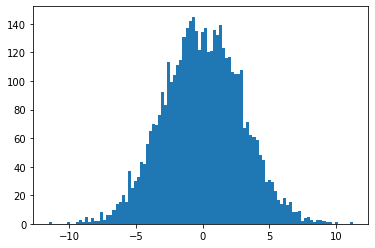

In [10]:
import matplotlib.pyplot as plt

plt.hist(residuals,bins=100)
plt.show()

# Inspecting the Consistency of the Errors

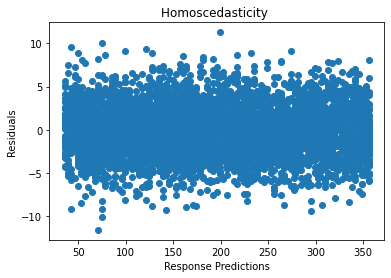

In [11]:
plt.scatter(response_predictions,residuals)
plt.title("Homoscedasticity ")
plt.xlabel("Response Predictions")
plt.ylabel("Residuals")
plt.show()